In [1]:
# %%
import json
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd

RESULTS_DIR = Path("results")

# Load FRCNN history
with open(RESULTS_DIR / "frcnn_history.json") as f:
    frcnn_hist = json.load(f)

# Load DETR history
with open(RESULTS_DIR / "detr_hf_history.json") as f:
    detr_hist = json.load(f)

# Load YOLO history (pretrained + finetuned summary)
with open(RESULTS_DIR / "yolo_history.json") as f:
    yolo_hist = json.load(f)

# YOLO training curve (per-epoch) if available
yolo_results_csv = RESULTS_DIR / "yolov8_results.csv"
yolo_df = pd.read_csv(yolo_results_csv) if yolo_results_csv.exists() else None

frcnn_hist, detr_hist, yolo_hist[:2], (yolo_df.head() if yolo_df is not None else None)


([{'epoch': 0,
   'train_loss': None,
   'AP': 0.0,
   'AP50': 0.0,
   'AP75': 0.0,
   'APs': 0.0,
   'APm': 0.0,
   'APl': 0.0},
  {'epoch': 1,
   'train_loss': 1.2294999432563782,
   'AP': 0.026606035776749026,
   'AP50': 0.05399899423392698,
   'AP75': 0.024391447583205703,
   'APs': 0.033915420192974007,
   'APm': 0.04018507828784239,
   'APl': 0.023440613930247513},
  {'epoch': 2,
   'train_loss': 0.9674678343832492,
   'AP': 0.11545506934561221,
   'AP50': 0.24565179298047324,
   'AP75': 0.09211174000232775,
   'APs': 0.10455780264230348,
   'APm': 0.16798894832232866,
   'APl': 0.10916203182422457},
  {'epoch': 3,
   'train_loss': 0.7763243667483329,
   'AP': 0.15369117694378592,
   'AP50': 0.3383323491440074,
   'AP75': 0.11070241602595422,
   'APs': 0.11902122302491748,
   'APm': 0.20767423939503218,
   'APl': 0.21458614270186682}],
 [{'epoch': 0,
   'train_loss': None,
   'val_loss': None,
   'AP': 0.0,
   'AP50': 0.0,
   'AP75': 0.0,
   'APs': 0.0,
   'APm': 0.0,
   'APl': 0

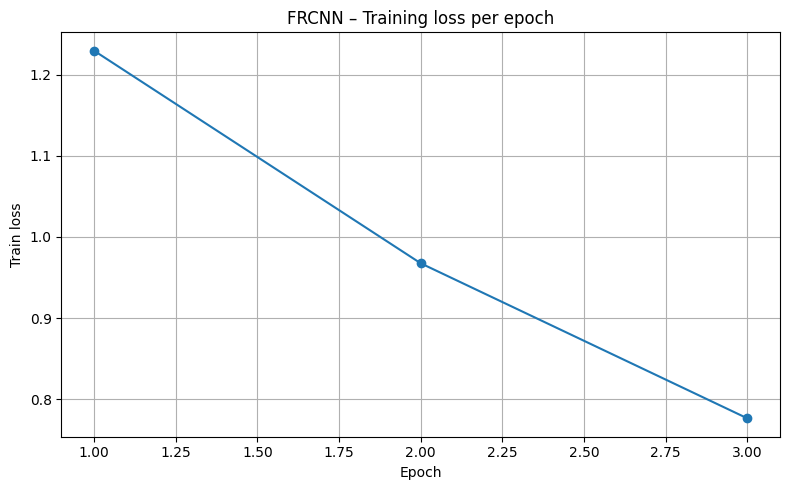

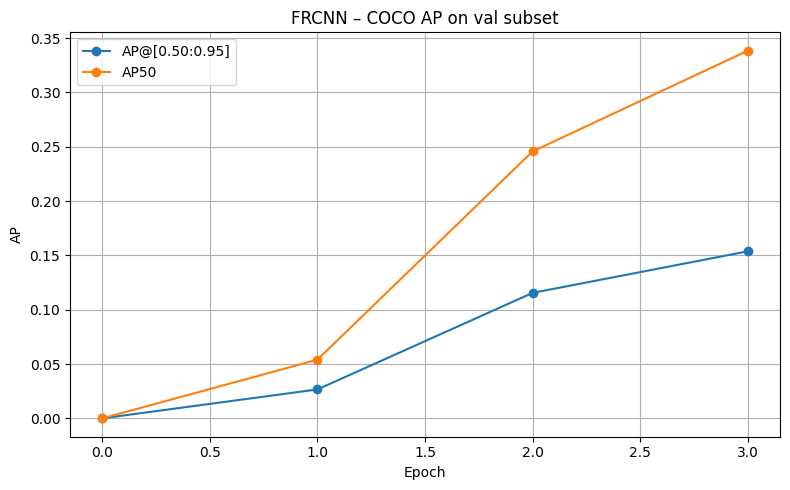

In [2]:
# %%
# FRCNN: plot train_loss and AP over epochs

# Filter out entries that have an epoch and maybe AP
frcnn_epochs = [e["epoch"] for e in frcnn_hist]
frcnn_train_loss = [e.get("train_loss") for e in frcnn_hist]
frcnn_ap = [e.get("AP") for e in frcnn_hist]
frcnn_ap50 = [e.get("AP50") for e in frcnn_hist]

plt.figure(figsize=(8, 5))
plt.plot(frcnn_epochs, frcnn_train_loss, marker="o")
plt.title("FRCNN – Training loss per epoch")
plt.xlabel("Epoch")
plt.ylabel("Train loss")
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(frcnn_epochs, frcnn_ap, marker="o", label="AP@[0.50:0.95]")
plt.plot(frcnn_epochs, frcnn_ap50, marker="o", label="AP50")
plt.title("FRCNN – COCO AP on val subset")
plt.xlabel("Epoch")
plt.ylabel("AP")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


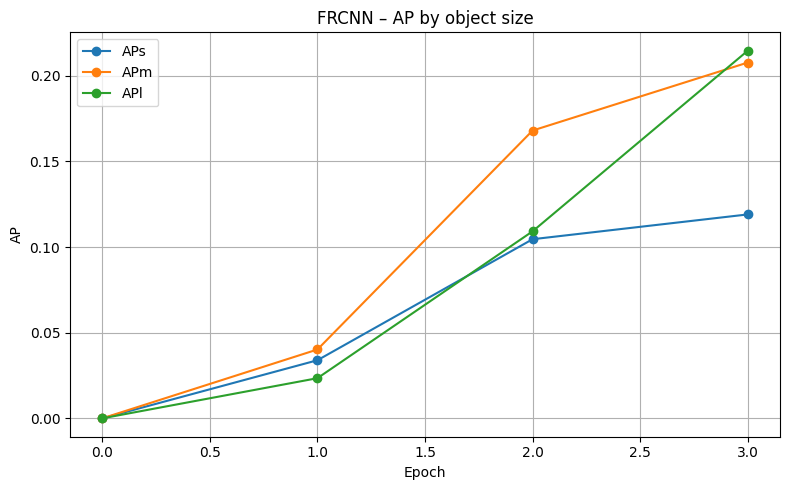

In [3]:
# %%
plt.figure(figsize=(8, 5))
plt.plot(frcnn_epochs, [e.get("APs") for e in frcnn_hist], marker="o", label="APs")
plt.plot(frcnn_epochs, [e.get("APm") for e in frcnn_hist], marker="o", label="APm")
plt.plot(frcnn_epochs, [e.get("APl") for e in frcnn_hist], marker="o", label="APl")
plt.title("FRCNN – AP by object size")
plt.xlabel("Epoch")
plt.ylabel("AP")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


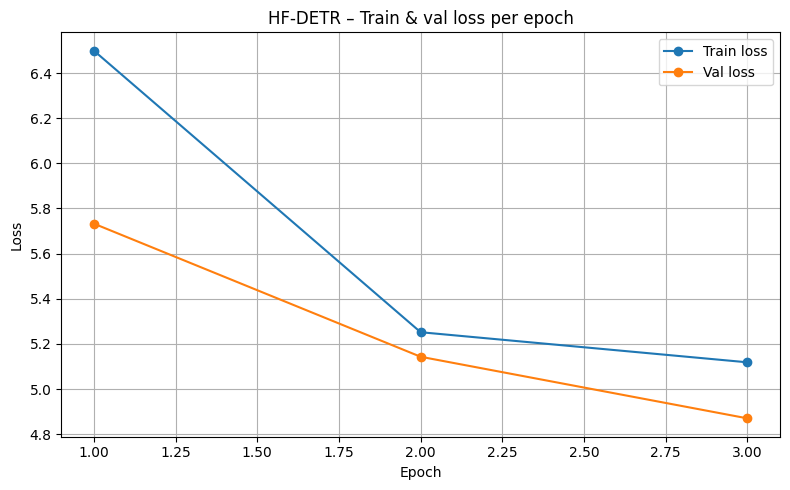

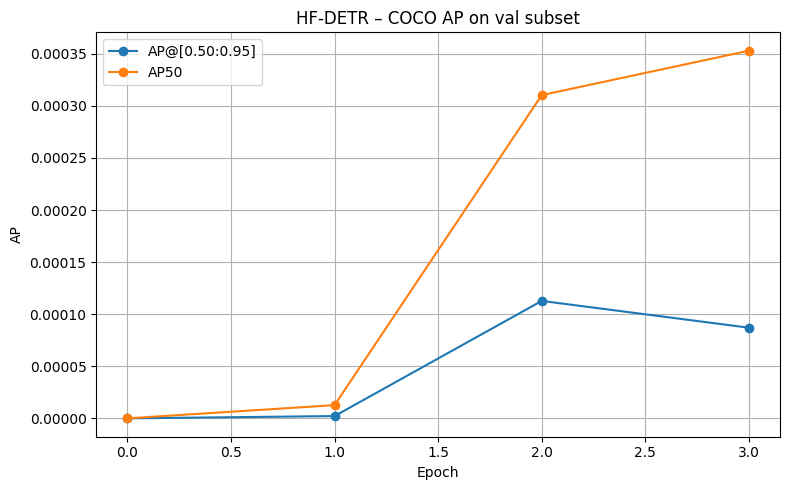

In [4]:
# %%
detr_epochs = [e["epoch"] for e in detr_hist]
detr_train_loss = [e.get("train_loss") for e in detr_hist]
detr_val_loss = [e.get("val_loss") for e in detr_hist]
detr_ap = [e.get("AP") for e in detr_hist]
detr_ap50 = [e.get("AP50") for e in detr_hist]

plt.figure(figsize=(8, 5))
plt.plot(detr_epochs, detr_train_loss, marker="o", label="Train loss")
plt.plot(detr_epochs, detr_val_loss, marker="o", label="Val loss")
plt.title("HF-DETR – Train & val loss per epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(detr_epochs, detr_ap, marker="o", label="AP@[0.50:0.95]")
plt.plot(detr_epochs, detr_ap50, marker="o", label="AP50")
plt.title("HF-DETR – COCO AP on val subset")
plt.xlabel("Epoch")
plt.ylabel("AP")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


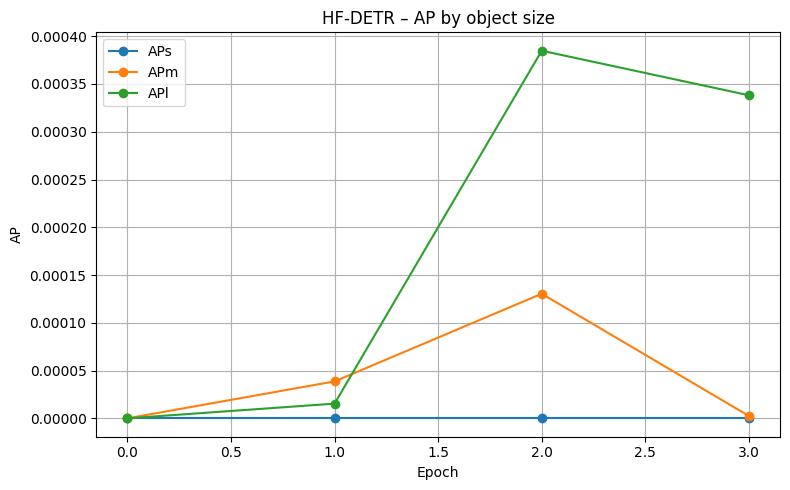

In [5]:
# %%
plt.figure(figsize=(8, 5))
plt.plot(detr_epochs, [e.get("APs") for e in detr_hist], marker="o", label="APs")
plt.plot(detr_epochs, [e.get("APm") for e in detr_hist], marker="o", label="APm")
plt.plot(detr_epochs, [e.get("APl") for e in detr_hist], marker="o", label="APl")
plt.title("HF-DETR – AP by object size")
plt.xlabel("Epoch")
plt.ylabel("AP")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


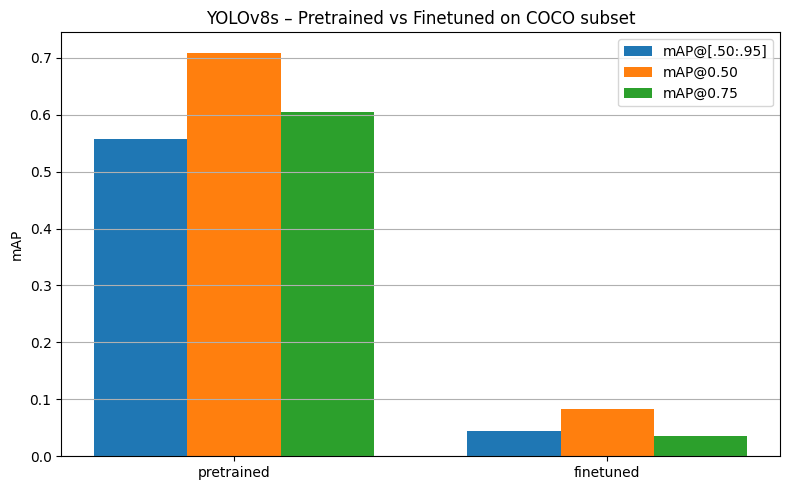

In [6]:
# %%
stages = [e["stage"] for e in yolo_hist]
yolo_map = [e["map"] for e in yolo_hist]
yolo_map50 = [e["map50"] for e in yolo_hist]
yolo_map75 = [e["map75"] for e in yolo_hist]

x = range(len(stages))

plt.figure(figsize=(8, 5))
width = 0.25
plt.bar([i - width for i in x], yolo_map, width=width, label="mAP@[.50:.95]")
plt.bar(x, yolo_map50, width=width, label="mAP@0.50")
plt.bar([i + width for i in x], yolo_map75, width=width, label="mAP@0.75")

plt.xticks(list(x), stages)
plt.title("YOLOv8s – Pretrained vs Finetuned on COCO subset")
plt.ylabel("mAP")
plt.legend()
plt.grid(axis="y")
plt.tight_layout()
plt.show()


Index(['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
       'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
       'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
       'lr/pg0', 'lr/pg1', 'lr/pg2'],
      dtype='object')


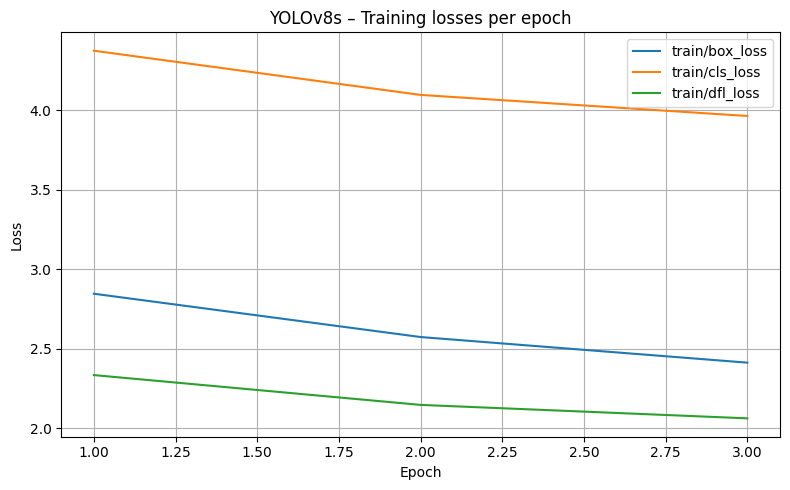

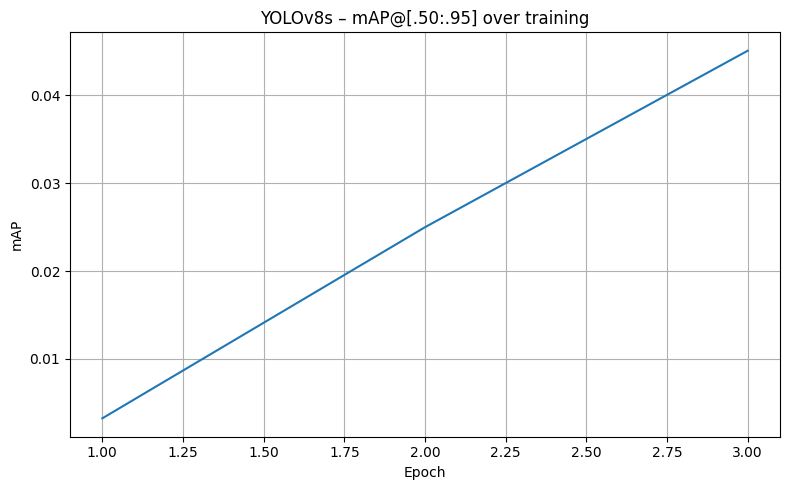

In [7]:
# %%
if yolo_df is not None:
    # Ultralytics results.csv typically has columns: epoch, box_loss, cls_loss, dfl_loss, mAP50-95(B), etc.
    print(yolo_df.columns)

    plt.figure(figsize=(8, 5))
    plt.plot(yolo_df["epoch"], yolo_df["train/box_loss"], label="train/box_loss")
    if "train/cls_loss" in yolo_df.columns:
        plt.plot(yolo_df["epoch"], yolo_df["train/cls_loss"], label="train/cls_loss")
    if "train/dfl_loss" in yolo_df.columns:
        plt.plot(yolo_df["epoch"], yolo_df["train/dfl_loss"], label="train/dfl_loss")
    plt.title("YOLOv8s – Training losses per epoch")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # mAP curve during training if present
    mcol = None
    for c in yolo_df.columns:
        if "metrics/mAP50-95(B)" in c or "metrics/mAP50-95" in c:
            mcol = c
            break

    if mcol is not None:
        plt.figure(figsize=(8, 5))
        plt.plot(yolo_df["epoch"], yolo_df[mcol])
        plt.title("YOLOv8s – mAP@[.50:.95] over training")
        plt.xlabel("Epoch")
        plt.ylabel("mAP")
        plt.grid(True)
        plt.tight_layout()
        plt.show()
else:
    print("YOLO results.csv not found; skipping per-epoch YOLO plots.")


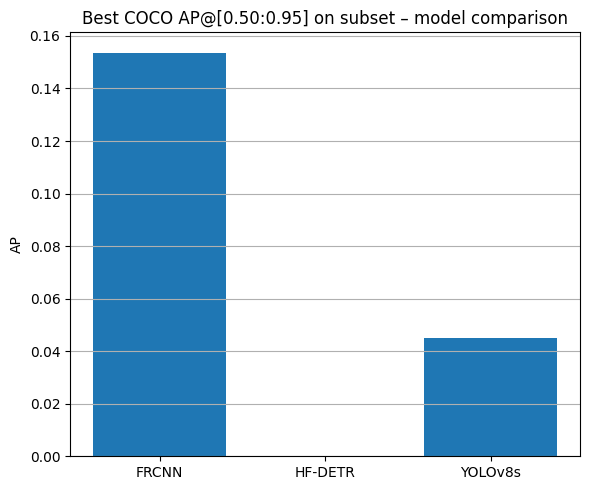

In [8]:
# %%
# best FRCNN AP
best_frcnn_ap = max(e.get("AP", 0.0) for e in frcnn_hist if e.get("AP") is not None)
# best DETR AP
best_detr_ap = max(e.get("AP", 0.0) for e in detr_hist if e.get("AP") is not None)
# best YOLO AP (take finetuned stage)
best_yolo_ap = max(e["map"] for e in yolo_hist if e["stage"] == "finetuned")

models = ["FRCNN", "HF-DETR", "YOLOv8s"]
aps = [best_frcnn_ap, best_detr_ap, best_yolo_ap]

plt.figure(figsize=(6, 5))
plt.bar(models, aps)
plt.title("Best COCO AP@[0.50:0.95] on subset – model comparison")
plt.ylabel("AP")
plt.grid(axis="y")
plt.tight_layout()
plt.show()
